# Allan Sasi

# *The Sparks Foundation*
## Iris Task
From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

## Exploratory Data Analysis
### Python Libraries being used:-
#### A.Data analysis

In [1]:
import pandas as pd
import numpy as np

#### B. Data Visualization

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

#### C. Model Prediction

In [3]:
from sklearn import datasets
from sklearn.cluster import KMeans

### Data Exraction or Loading Data
- Importing dataset.
- 1 files:-
    - iris data -- our training file.

In [4]:
iris = pd.read_csv("Iris.csv")
iris.columns = ['Id', 'sepal_lengthCm', 'sepal_widthCm', 'petal_lengthCm', 'petal_widthCm', 'Species']
iris.drop(["Id"],axis=1,inplace=True)
iris.head()

,sepal_lengthCm,sepal_widthCm,petal_lengthCm,petal_widthCm,Species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [5]:
iris.describe()

,sepal_lengthCm,sepal_widthCm,petal_lengthCm,petal_widthCm
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
sepal_lengthCm    149 non-null float64
sepal_widthCm     149 non-null float64
petal_lengthCm    149 non-null float64
petal_widthCm     149 non-null float64
Species           149 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


## DATA VISUALIZATION

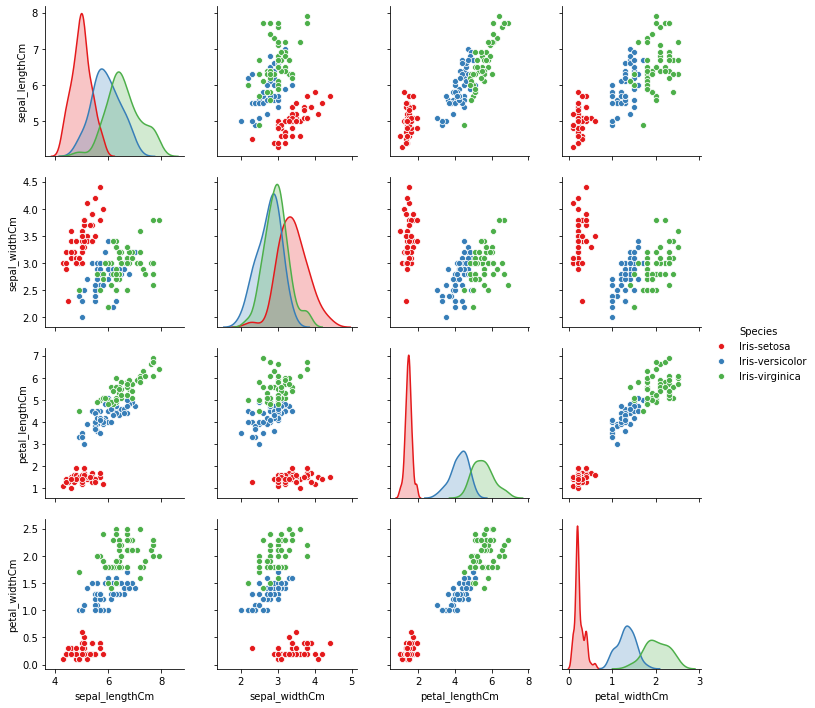

In [7]:
sns.pairplot(data=iris,hue="Species",palette="Set1")
plt.show()

In [8]:
d = ["sepal_lengthCm", "sepal_widthCm", "petal_lengthCm", "petal_widthCm"]

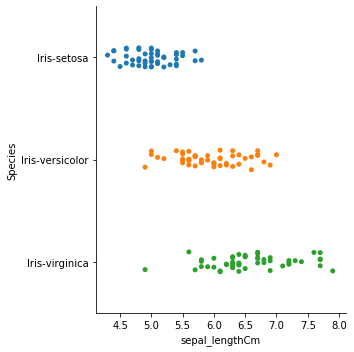

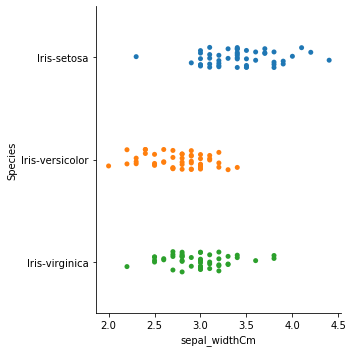

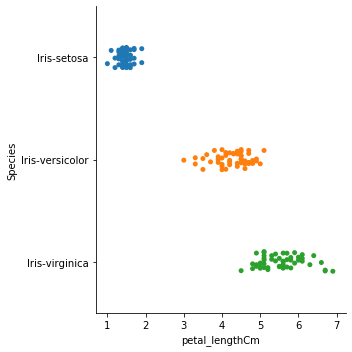

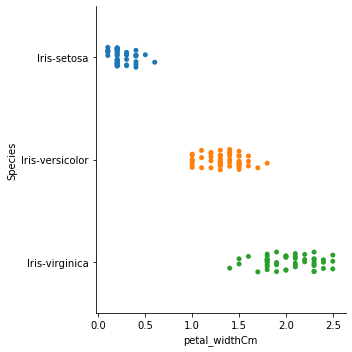

In [9]:
for d in d:
    sns.catplot(data=iris, x=d, y="Species")
    plt.show()

Observed that iris-setosa species is clearly separable from the other species.

In [10]:
features = iris.loc[:,["sepal_lengthCm", "sepal_widthCm", "petal_lengthCm", "petal_widthCm"]]

## Finding Clusters

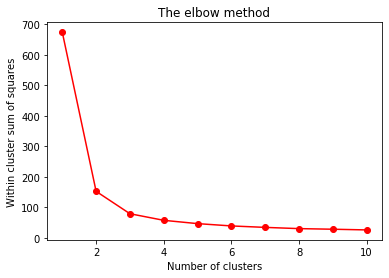

In [11]:
x = iris.iloc[:, [0, 1, 2, 3]].values

# Within cluster sum of squares
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss, 'ro-')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Within cluster sum of squares')
plt.show()

The optimum no. of clusters is where the elbow occurs.
So, selecting number of clusters as 3.

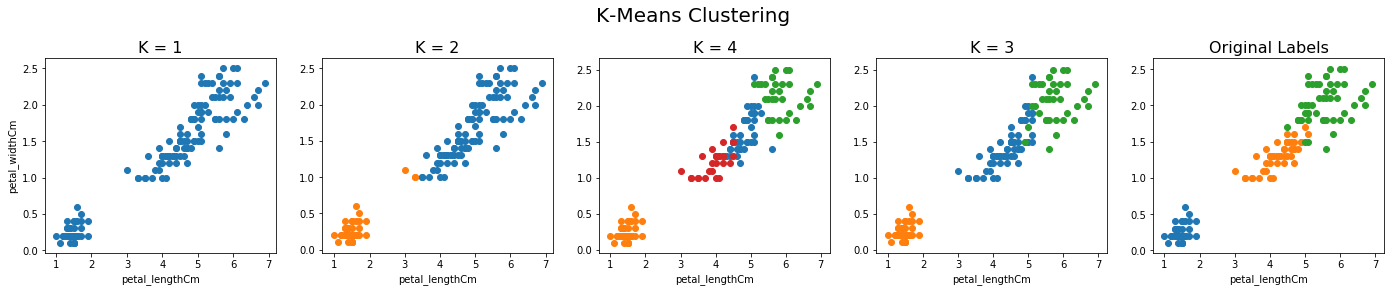

In [12]:
plt.figure(figsize=(24,4))
plt.suptitle("K-Means Clustering", fontsize=20)

plt.subplot(1,5,1)
plt.title("K = 1",fontsize=16)
plt.xlabel("petal_lengthCm")
plt.ylabel("petal_widthCm")
plt.scatter(features.petal_lengthCm,features.petal_widthCm)

plt.subplot(1,5,2)
plt.title("K = 2",fontsize=16)
plt.xlabel("petal_lengthCm")
kmeans = KMeans(n_clusters=2)
features["labels"] = kmeans.fit_predict(features)
plt.scatter(features.petal_lengthCm[features.labels == 0],features.petal_widthCm[features.labels == 0])
plt.scatter(features.petal_lengthCm[features.labels == 1],features.petal_widthCm[features.labels == 1])

features.drop(["labels"],axis=1,inplace=True)

plt.subplot(1,5,4)
plt.title("K = 3",fontsize=16)
plt.xlabel("petal_lengthCm")
kmeans = KMeans(n_clusters=3)
features["labels"] = kmeans.fit_predict(features)
plt.scatter(features.petal_lengthCm[features.labels == 0],features.petal_widthCm[features.labels == 0])
plt.scatter(features.petal_lengthCm[features.labels == 1],features.petal_widthCm[features.labels == 1])
plt.scatter(features.petal_lengthCm[features.labels == 2],features.petal_widthCm[features.labels == 2])

features.drop(["labels"],axis=1,inplace=True)

plt.subplot(1,5,3)
plt.title("K = 4",fontsize=16)
plt.xlabel("petal_lengthCm")
kmeans = KMeans(n_clusters=4)
features["labels"] = kmeans.fit_predict(features)
plt.scatter(features.petal_lengthCm[features.labels == 0],features.petal_widthCm[features.labels == 0])
plt.scatter(features.petal_lengthCm[features.labels == 1],features.petal_widthCm[features.labels == 1])
plt.scatter(features.petal_lengthCm[features.labels == 2],features.petal_widthCm[features.labels == 2])
plt.scatter(features.petal_lengthCm[features.labels == 3],features.petal_widthCm[features.labels == 3])

features.drop(["labels"],axis=1,inplace=True)

plt.subplot(1,5,5)
plt.title("Original Labels",fontsize=16)
plt.xlabel("petal_lengthCm")
plt.scatter(iris.petal_lengthCm[iris.Species == "Iris-setosa"],iris.petal_widthCm[iris.Species == "Iris-setosa"])
plt.scatter(iris.petal_lengthCm[iris.Species == "Iris-versicolor"],iris.petal_widthCm[iris.Species == "Iris-versicolor"])
plt.scatter(iris.petal_lengthCm[iris.Species == "Iris-virginica"],iris.petal_widthCm[iris.Species == "Iris-virginica"])

plt.subplots_adjust(top=0.8)
plt.show()

In [13]:
kmeans = KMeans(n_clusters = 3, n_jobs=-1, init = 'k-means++', n_init = 10, max_iter = 300, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

c:\users\allan\appdata\local\programs\python\python36\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


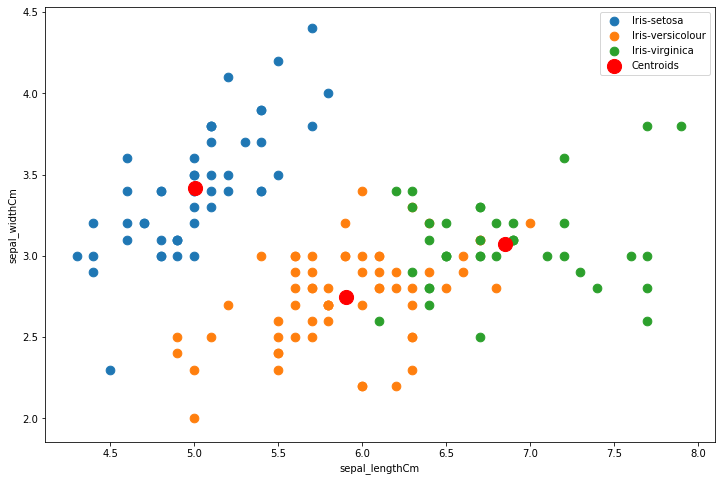

In [14]:
plt.figure(figsize=(12,8))

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 75, label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 75, label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 75, label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 200, c = 'red', label = 'Centroids')

plt.xlabel("sepal_lengthCm")
plt.ylabel("sepal_widthCm")
plt.legend()